
## Reinforcement learning

#### Lecturer: Tai Le Quy
#### 17.01.2024

In this tutorial we will introduce the reinforcement learning with an example of Q-learning on the Gym library

## 1. Gym 
Gym is a standard API for reinforcement learning, and a diverse collection of reference environments
### Frozen Lake
https://www.gymlibrary.dev/environments/toy_text/frozen_lake/
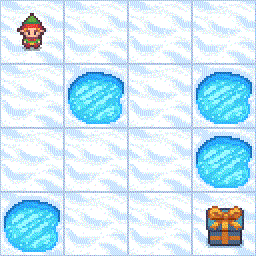
This environment is part of the Toy Text environments. Frozen lake involves crossing a frozen lake from Start(S) to Goal(G) without falling into any Holes(H) by walking over the Frozen(F) lake. The agent may not always move in the intended direction due to the slippery nature of the frozen lake.

#### Action Space
The agent takes a 1-element vector for actions. The action space is (dir), where dir decides direction to move in which can be:
- 0: LEFT
- 1: DOWN
- 2: RIGHT
- 3: UP

#### Observation Space
The observation is a value representing the agent’s current position as current_row * nrows + current_col (where both the row and col start at 0). For example, the goal position in the 4x4 map can be calculated as follows: 3 * 4 + 3 = 15. The number of possible observations is dependent on the size of the map. For example, the 4x4 map has 16 possible observations.

#### Rewards
Reward schedule:
- Reach goal(G): +1
- Reach hole(H): 0
- Reach frozen(F): 0

#### Install Gym library

In [3]:
#Method 1: Install gym (run on the command screen if you use anaconda for Python)
#conda install -c conda-forge gym
#Method 2: Install by pip
#pip install gym

Retrieving notices: ...working... done
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - gym

Current channels:

  - http://conda.anaconda.org/gurobi/win-64
  - http://conda.anaconda.org/gurobi/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




## 2. Q-learning
Source: https://towardsdatascience.com/q-learning-algorithm-from-explanation-to-implementation-cdbeda2ea187

In [15]:
#Import libraries
import numpy as np
import gym
import matplotlib.pyplot as plt

In [16]:
#Instantiate our environment and get its sizes
# map_name="4x4" or map_name="8x8"
env = gym.make("FrozenLake-v1",map_name="4x4")
n_observations = env.observation_space.n
n_actions = env.action_space.n

In [17]:
#Show the enviroment
env.render(mode = 'human')


SFFF
FHFH
FFFH
HFFG


In [18]:
#Initialize the Q-table to 0
Q_table = np.zeros((n_observations,n_actions))
print(Q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [19]:
#Define the different parameters and hyperparameters
#number of episode we will run
n_episodes = 10000

#maximum of iteration per episode
max_iter_episode = 100

#initialize the exploration probability to 1
exploration_proba = 1

#exploartion decreasing decay for exponential decreasing
exploration_decreasing_decay = 0.001

# minimum of exploration proba
min_exploration_proba = 0.01

#discounted factor
gamma = 0.99

#learning rate
lr = 0.1

To evaluate the agent training, we will store the total rewards he gets from the environment after each episode in a list that we will use after the training is finished

In [20]:
total_rewards_episode = list()

In [21]:
#The main loop where all the process will happen
#we iterate over episodes
for e in range(n_episodes):
    #we initialize the first state of the episode
    current_state = env.reset()
    done = False
    
    #sum the rewards that the agent gets from the environment
    total_episode_reward = 0
    
    for i in range(max_iter_episode): 
        # we sample a float from a uniform distribution over 0 and 1
        # if the sampled float is less than the exploration proba
        #     the agent selects arandom action
        # else
        #     he exploits his knowledge using the bellman equation 
        
        if np.random.uniform(0,1) < exploration_proba:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q_table[current_state,:])
        
        # The environment runs the chosen action and returns
        # the next state, a reward and true if the epiosed is ended.
        next_state, reward, done, _ = env.step(action)
        
        # We update our Q-table using the Q-learning iteration
        Q_table[current_state, action] = (1-lr) * Q_table[current_state, action] +lr*(reward + gamma*max(Q_table[next_state,:]))
        total_episode_reward = total_episode_reward + reward
        # If the episode is finished, we leave the for loop
        if done:
            break
        current_state = next_state
    #We update the exploration proba using exponential decay formula 
    exploration_proba = max(min_exploration_proba, np.exp(-exploration_decreasing_decay*e))
    total_rewards_episode.append(total_episode_reward)

In [22]:
print(Q_table)

[[0.57304928 0.49227269 0.49153005 0.48611235]
 [0.30021964 0.35842856 0.20767803 0.42783493]
 [0.35941755 0.28756235 0.2896455  0.33039665]
 [0.08493391 0.13359253 0.00769651 0.27501128]
 [0.59167303 0.27119886 0.31532353 0.41086947]
 [0.         0.         0.         0.        ]
 [0.27988175 0.15349208 0.17132712 0.09015997]
 [0.         0.         0.         0.        ]
 [0.25580616 0.3287233  0.43132547 0.61944953]
 [0.4383157  0.63386096 0.49603922 0.51357518]
 [0.48560599 0.4657401  0.29471452 0.29044414]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.40367233 0.47727035 0.74951618 0.52025218]
 [0.69218522 0.90882226 0.760245   0.74383021]
 [0.         0.         0.         0.        ]]


In [23]:
#Once our agent is trained, we will test his performance using the rewards per episode list. 
#We will do that by evaluating his performance every 1000 episodes.
print("Mean reward per thousand episodes")
for i in range(10):
    print((i+1)*1000,": mean espiode reward: ",\
           np.mean(total_rewards_episode[1000*i:1000*(i+1)]))

Mean reward per thousand episodes
1000 : mean espiode reward:  0.062
2000 : mean espiode reward:  0.229
3000 : mean espiode reward:  0.447
4000 : mean espiode reward:  0.576
5000 : mean espiode reward:  0.667
6000 : mean espiode reward:  0.702
7000 : mean espiode reward:  0.69
8000 : mean espiode reward:  0.65
9000 : mean espiode reward:  0.653
10000 : mean espiode reward:  0.687
